In [24]:
import pandas as pd
import spacy
from typing import List
from collections import Counter

from matplotlib import pyplot as plt 
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("mako")

In [2]:
df = pd.read_parquet("/Users/luis.morales/Desktop/arxiv-paper-recommender/data/processed/arxiv_papers.parquet.gzip")

In [18]:
# text_corpus = df['cleaned_abstracts'].to_list()

In [3]:
def get_corpus_tokens(text_corpus: List[List[str]]) -> List[str]:
    """
    Extracts tokens from a given text corpus using spaCy.
    Args:
        text_corpus (List[List[str]]): A list of lists where each inner list represents a document in the corpus.
    Returns:
        List[str]: A list of tokens extracted from the corpus.
    """
    tokens = list()  
    nlp = spacy.load('en_core_web_sm') 
    
    for doc in text_corpus:
        nlp_doc = nlp.make_doc(doc)
        tokens.extend([token.text for token in nlp_doc])
        
    return tokens

In [15]:
# with open("/Users/luis.morales/Desktop/arxiv-paper-recommender/data/processed/corpus_tokens.txt", "w") as file:
#     list_string = '\n'.join(str(item) for item in corpus_tokens)
#     file.write(list_string)

In [4]:
def read_list_from_file(file_path: str):
    """
    Reads a text file containing a list and converts it back to a Python list
    Args:
        file_path (str): Path to the text file
    Returns:
        list: The Python list read from the file.
    """
    try:
        with open(file_path, 'r') as file:
            # Read the contents of the file
            file_contents = file.read()
            lines = file_contents.split('\n')
            plist = [item for item in lines if item]

            return plist
    except FileNotFoundError:
        raise FileNotFoundError("The specified file cannot be found.")

In [5]:
corpus_tokens = read_list_from_file("/Users/luis.morales/Desktop/arxiv-paper-recommender/data/processed/corpus_tokens.txt")

In [6]:
count_words = Counter(corpus_tokens)

In [7]:
type(count_words)

collections.Counter

In [8]:
most_common_words = count_words.most_common(1000)

In [33]:
words_count_df = pd.DataFrame(most_common_words, columns=['word', 'count']).sort_values(by="count", ascending=False)
words_count_df

,word,count
0,,26467421
1,$,4088943
2,,2459316
3,model,1598013
4,result,1064830
...,...,...
995,cavity,40578
996,community,40478
997,trace,40448
998,relatively,40385


In [35]:
words_count_df = words_count_df.drop(words_count_df.index[:3])

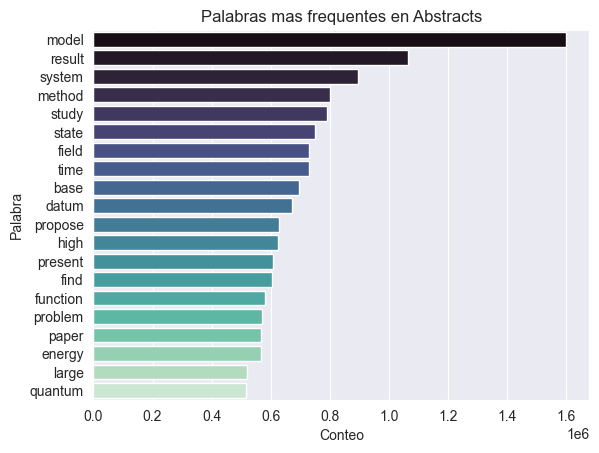

In [36]:
sns.barplot(x="count", y="word", data=words_count_df.head(20), palette="mako").set(title='Palabras mas frequentes en Abstracts')
plt.xlabel("Conteo")
plt.ylabel("Palabra")
plt.savefig("/Users/luis.morales/Desktop/arxiv-paper-recommender/reports/Visualizations/FrequenciaPalabras.png"
            ,dpi=300, bbox_inches='tight')
plt.show()

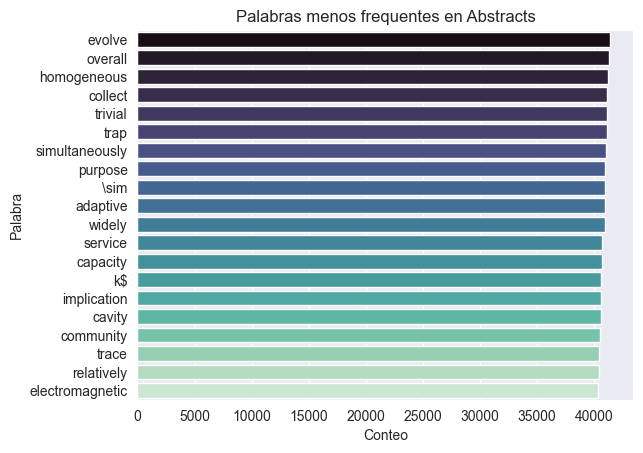

In [37]:
sns.barplot(x="count", y="word", data=words_count_df.tail(20), palette="mako").set(title='Palabras menos frequentes en Abstracts')
plt.xlabel("Conteo")
plt.ylabel("Palabra")
plt.savefig("/Users/luis.morales/Desktop/arxiv-paper-recommender/reports/Visualizations/FrequenciaPalabrasMenosFreq.png"
            ,dpi=300, bbox_inches='tight')
plt.show()